# Naive Bayes classifiers

## Naive Bayes with categorical feature from scratch

The features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.
We aim at modeling the data distribution with a best-fit multinomial distribution.

In [42]:
"""

First let us design a simple dataset taking into account weather related features:
    - outlook in {'sunny', 'overcast', 'rainy'}
    - temp: level of temperature {'hot','cool','mild'}
    - humidity: level of humidity {'high', 'normal'}
    - windy: either it is windy are not {'yes','no'}
Then we aim at predicting either a tennis match can be played or not. "play" in {'yes','no'}.


"""
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

outlook=['sunny', 'overcast', 'rain']
temperature=['hot', 'mild', 'cold']
humidity=['high', 'normal']
wind=['yes', 'no']
play=['yes', 'no']

dataset=[["outlook", "temp", "humidity", "windy", "play"],
    ["sunny", "hot", "high", "no", "no"],
    ["sunny", "hot", "high", "yes", "no"],
    ["overcast", "hot", "high", "no", "yes"],
    ["rainy", "mild", "high", "no", "yes"],
    ["rainy", "cool", "normal", "no", "yes"],
    ["rainy", "cool", "normal", "yes", "no"],
    ["overcast", "cool", "normal", "yes", "yes"],
    ["sunny", "mild", "high", "no", "no"],
    ["sunny", "cool", "normal", "no", "yes"],
    ["rainy", "mild", "normal", "no", "yes"],
    ["sunny", "mild", "normal", "yes", "yes"],
    ["overcast", "mild", "high", "yes", "yes"],
    ["overcast", "hot", "normal", "no", "yes"],
    ["rainy", "mild", "high", "yes", "no"]]

df = pd.DataFrame(dataset[1:], columns=dataset[0])
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


 [To do Students]: Complete the following functions

In [98]:

def prior_probability(play_outcome):
    """
    input:
        - play_outcome: string taking values in ['yes','no']
    output:
        - prior probability P(play = play_outcome) 
    """
    m = 0
    for i in df['play']:
        if i==play:
            m += 1
    return m/len(df['play'])

def likelihood(feature_name, feature_value, play_outcome):
    """
    inputs: 
        feature_name: string with values in df column names
        feature_value: given value of the variable corresponding to feature_name
        play_outcome: outcome of target variable "play" 
    output:
        Compute the conditional probability P(feature_name = feature_value|play= play_outcome)
    """
    #We simply calculate P(feature_name = feature_value|play= play_outcome):
    c = feature_name
    p1=0
    p2=0
    for i, j in zip(df[c],df['play']):
      if j==play_outcome:
        p1 += 1
      else:
        pass
      if (i == feature_value) & (j==play_outcome):
        p2 +=1
    return p1/p2


def predict_play_outcome(outlook,temp,humidity,windy):
    """
    inputs:
        outlook: value of outlook for a given observation 
        temp: value of outlook for a given observation 
        humidity: value of outlook for a given observation 
        windy: value of outlook for a given observation 
    Outputs:
        predicted label by multinomial naive bayes for the given observation (outlook,temp,humidity,windy)
    """ 
    #For each functipn parameter, we calculate P_yes and P_no:
    feature_values = [outlook,temp,humidity,windy]
    feature_names = ['outlook','temp','humidity','windy']
    P_yes=0
    P_no=0
    for i in range(0,4):
      P_yes += likelihood(feature_names[i], feature_values[i],'yes')* prior_probability('yes')
      P_no += likelihood(feature_names[i], feature_values[i],'no')* prior_probability('no')
    if P_yes > P_no:
      return 'yes'
    else:
      return 'no'

predict_play_outcome('sunny', 'cool', 'high', 'yes')    

'no'

## The same using sklearn library

All features are categorical, we need to use Multinomial Naive Bayes.

* Step 1: encode the feature in categories (MultinomialNB doesn't work with string)
* Step 2: fit MultinomialNB
* Step 3: predict with MultinomialNB

In [44]:
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# fit_transform the dataset
df_enc = df.apply(lambda col: le.fit_transform(col))
print(len(df))
df_enc.head()

14


,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


[To do Students]:
- Learn multinomial Naive Bayes using sklearn without and with Laplace smoothing. Plus detail available model hyperparameters of the sklearn implementation.
- Compare predicted probabilities and label on df_test
- Design an example to highlight importance of Laplace smoothing.


Let's first create X_train and y_train:

In [45]:
X_train = df_enc.drop(['play'], axis=1)
y_train = df_enc['play']


Parameters:
- fit_prior:
Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
- class_prior: 
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
- alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

##1. With Laplace smoothing

In [46]:
from sklearn.naive_bayes import MultinomialNB

#alpha == 1: Yes Laplacian smoothing
mnb = MultinomialNB(alpha=1, fit_prior= True, class_prior= None)
mnb.fit(X_train, y_train)



MultinomialNB(alpha=1)

In [47]:
# Build new item for prediction
df_test = pd.DataFrame(data=[['sunny', 'cool', 'high', 'yes']],
                    columns=['outlook', 'temp', 'humidity', 'windy'])

# Encode it and make prediction
X_test = df_test.apply(lambda col: le.fit_transform(col))
X_test

,outlook,temp,humidity,windy
0,0,0,0,0


In [48]:
#Prediction:
y_pred = mnb.predict_proba(X_test)
y_pred

array([[0.35714286, 0.64285714]])

With Laplacian smoothing, the predicted test label is class-1 ('yes') with probability 0.642.

##2. Without Laplace smoothing

In [49]:
from sklearn.naive_bayes import MultinomialNB

#alpha : Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
mnb2 = MultinomialNB(alpha=0, fit_prior= True, class_prior= None)
mnb2.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


MultinomialNB(alpha=0)

In [50]:
#Prediction:
y_pred2 = mnb2.predict_proba(X_test)
y_pred2

array([[0.35714286, 0.64285714]])

Again the predicted test label is class-1 ('yes') with probability 0.642. The laplacian parameter didn't change anything. The reason could be the training and testing dataset is too small.

##3. Design an example to highlight importance of Laplace smoothing

If a feature component value is not contained in the training set and is not
supported by the estimated conditional distribution of this feature, we use Laplace smoothing. So, create a test set and put a feature that does not in the training set.

Remember the columns and features (the whole dataset):

In [51]:
outlook=['sunny', 'overcast', 'rain']
temperature=['hot', 'mild', 'cold']
humidity=['high', 'normal']
wind=['yes', 'no']
play=['yes', 'no']
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


- Let's create a test set where features are: ['OVEROVERCAST', 'FREEZING', 'LOW', 'no','yes']. I changed 3 features for testing set namely: 'OVEROVERCAST', 'FREEZING', 'LOW' that are not in training set. I did this because the training dataset is so small, and in oder to observe Laplacian smoothing effect clearly.



Then I added it the test set to the training set with pd.concat() function below. The test set and train set labels should be encoded together because the encoded labels should be same. Then we can split them and create test and training data again.

In [52]:
#Create a test set where 'humidity' is LOW:
df_lambda_testing = pd.DataFrame(data=[['OVEROVERCAST', 'FREEZING', 'LOW', 'noo','yes']],
                    columns=['outlook', 'temp', 'humidity', 'windy','play'])
#Merge test and training data:
df_all=pd.concat([df,df_lambda_testing])
print(len(df_all))
df_all

15


,outlook,temp,humidity,windy,play
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes
5,rainy,cool,normal,yes,no
6,overcast,cool,normal,yes,yes
7,sunny,mild,high,no,no
8,sunny,cool,normal,no,yes
9,rainy,mild,normal,no,yes


Encode the all dataframe:

In [ ]:
#The testing and training set was merged as df_all. Now we encode them:
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()
df_all_encoded = df_all.apply(lambda col: le.fit_transform(col))
print(len(df_all_encoded))
#df_all_encoded

Split test and train datasets. The last row of the df_all will be the test set.

In [54]:
#Test set:
test = df_all_encoded[-1:]
#Create X_test and y_test:
X_testt = test.drop(['play'], axis=1)
y_testt = test['play']
X_testt

,outlook,temp,humidity,windy
0,0,0,0,1


We created the test set. Now, drop the last row of the df_all since it is the test set. The rest of the dataset is the traning dataset:

In [ ]:
#Drop the last row:
df_all_encoded = df_all_encoded[:len(df_all_encoded)-1]
print(len(df_all_encoded))
#df_all_encoded

Create X_train and y_train:

In [56]:
X_trainn = df_all_encoded.drop(['play'], axis=1)
y_trainn = df_all_encoded['play']
print(len(X_trainn), len(y_trainn))

14 14


Now let's build two MultinomialNB() models with and without Laplacian smooting:

In [57]:
from sklearn.naive_bayes import MultinomialNB

#alpha == 1:Laplacian smoothing exists:
mnb_yes_laplacian = MultinomialNB(alpha=1, fit_prior= True, class_prior= None)

#Fit the model
mnb_yes_laplacian.fit(X_trainn, y_trainn)

#Predict the probability:
y_pred_proba = mnb_yes_laplacian.predict_proba(X_testt)
print(y_pred_proba)

[[0.45454545 0.54545455]]


The prediction for class-1 'yes' has probability of 0.545 with Laplacian smoothing.

Now, let's build another MultinomialNB() model WITHOUT Laplacian smoothing:

In [58]:
from sklearn.naive_bayes import MultinomialNB

#alpha == 0: Laplacian smoothing DOES NOT exist:
mnb_no_laplacian = MultinomialNB(alpha=0.000, fit_prior= True, class_prior= None)

#Fit the model
mnb_no_laplacian.fit(X_trainn, y_trainn)

#Predict the probability:
y_pred_prob = mnb_no_laplacian.predict_proba(X_testt)
print(y_pred_prob)

   outlook  temp  humidity  windy
0        0     0         0      1
[[0.46357616 0.53642384]]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


The prediction for class-1 'yes' has probability of 0.536 without Laplacian smoothing.

Results and discussion:

- True label = 'yes'
- with Laplacian smoothing= 0.545 'yes'
- without Laplacian smoothing= 0.536 'yes'

The features belong to data point in test set are all different from train set features. With this way I only observe the laplacian effect. When I only change one feature in the test set, the MultinomialNB() prediction does not change among alpha=1 and alpha=0. 

The laplacian smoothing increased the accuracy for prediction of true class.


## Multinomial Naive Bays: text classification


One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [73]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [74]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [75]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the well-known TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [77]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

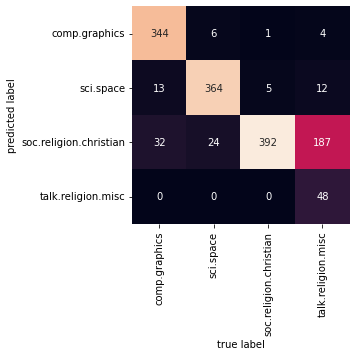

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [67]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [68]:
predict_category('sending a payload to the ISS')

'sci.space'

In [69]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## Naive Bayes with continuous data from scratch

For continuous data we assume the conditional probabilities P(X|Y) to follow gaussian distributions. 

In [70]:
''' Define the dataset '''
import numpy as np

Yes=[25.2,19.3,18.5,21.7,20.1,24.3,22.8,23.1,19.8]
No=[27.3,30.1,17.4,29.5,15.1]

[TO DO STUDENTS]

- Implement the computation of first and second moments of the continuous feature for each class.
- Implement the computation of the posterior probability P(Y|X)

In [85]:
''' Calculate the posterior probability P(Y|X) '''
def P(x, y=True):
  if x==True:
    posterior_probability = 1
  else:
    posterior_probability = 0
  return posterior_probability

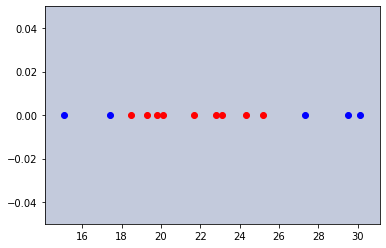

In [86]:
''' Plot the boundaries '''
import matplotlib.pyplot as plt
import math
%matplotlib inline

x_min, x_max = min(Yes+No)-1, max(Yes+No)+1

plt.plot(Yes, np.zeros_like(Yes),'ro')
plt.plot(No, np.zeros_like(No),'bo')

xx=np.linspace(x_min,x_max,100)
zz=[1 if P(x, True)>=P(x, False) else 0 for x in xx]

plt.contourf(xx, [-0.05, 0.05], [zz, zz], alpha=0.3);

## Naive Bayes with continous using sklearn library

Data are continous, we use Gaussian Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB

X = np.array([Yes + No]).reshape(-1, 1)
y = [1]*len(Yes)+[0]*len(No)

nb = GaussianNB()
nb.fit(X, y)
"""
[TO DO STUDENTS]
Learn a Gaussian Naive Bayes classifier using sklearn implementation on this data (X,y)
"""

'\n[TO DO STUDENTS]\nLearn a Gaussian Naive Bayes classifier using sklearn implementation on this data (X,y)\n'

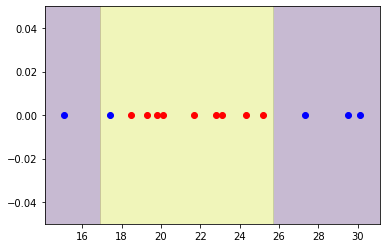

In [82]:
xx=np.linspace(x_min,x_max,1000).reshape(-1, 1)
zz = nb.predict(xx).tolist()

plt.plot(Yes, np.zeros_like(Yes),'ro')
plt.plot(No, np.zeros_like(No),'bo')
plt.contourf(xx.ravel().tolist(), [-0.05, 0.05], [zz, zz], alpha=0.3);